# <em>Coursework 1</em>
# Implementation of a Design Support System(DSS) by utilizing Bayesian Network.

<p>A DSS fufills roles such as filtering through massive amounts of data and creating outputs that are comprehensible and palatable for users.
This will enable data analysis on a big scale and empowers efficiency when decision making is required on massive data scale projects. Ultimately DSS
plays an important role in making informed decisions in a fast paced environment which huge flow of data is in core in its processes.</p>

<p><strong>Objectives overall for this project is to implement a Bayesian Network DDS with following aims:</strong></p>

* 1.) - Source a credible & useable dataset which reflects a probable real-world issue.

* 2.) - Aim to establish a basic form of network which represents the problem accurately.

* 3.) - Implementation of a DSS by utilizing Bayesian network as a base.

* 4.) - Challenging the DSS via queries and observe results.

* 5.) - Summarize and analyze the answers, discovering insights from query results.


## <em>Data Sourcing</em>

<p>I have sifted through multiple sites and sources for credible datasets with interesting questions.
This dataset particularly caught my interest with interesting properties within. The dataset i will be using consists of Taiwan
client demographics regarding credit card repayment collected within 6months from the year 2005 with information such as education, marriage and age.
These information will make interesting findings in this project as we get to find out how different aspects of information could be organised through a
DSS system and how it could affect probabilities of an individual defaulting his credit card payment given certain information.</p>

<p>Below is the URL of kaggle where i obtained my dataset:</p>
<p><strong>https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv</strong></p>

In [4]:
# Importing all relevant libraries and codes

import os
import pandas as pd
import seaborn as sns
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# Always a good practice to ensure root folders when working with external files

cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r : %s" % (cwd,files))

Files in 'C:\\Users\\daryl\\OneDrive\\Desktop\\Msc Data-Science\\Artificial Intelligence' : ['.idea', '01_Propositional Logic.pdf', '02_First-Order Logic.pdf', 'archive (2)', 'CW1 Webinar AI December 2022.pptx', 'DSM100 CW1 draft2.ipynb', 'DSM100_Coursework.pdf', 'main.py', 'Markov Decision Processes.pdf', 'T02_L01_Prolem Solving Agents and Search.pdf', 'T02_L02_Uninformed Search.pdf', 'T02_L03_Informed Search.pdf', 'T04_L01_Probability.pdf', 'T04_L02_Bayesian Networks.pdf', 'UCI_Credit_Card.csv', 'Value Iteration_Policy Iteration.pdf', 'Weather_Bayesian Model (2).ipynb']


In [6]:
# Importing the dataset via in csv

df = pd.read_csv("UCI_Credit_Card.csv"
                 , encoding=
                 'utf-8')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



## <em>Discovering the relevance of each data properties.</em>

<p>In order to establish a credible DSS, we have to first find out how does each information in the dataset have effect on another.
To achieve this, i have used the correlation heatgraph to understand how much each property affect another. By looking at the correlation,
i could establish the parent-child relation that is required for establishing a Bayesian network. For example, in the following codes, i have observed
that if a client pays on time for first period of repayment, it has a very high chance he wouldnt miss tha repayment period 2. Hence from this
correlation graph, i can therein build my Bayesian network model.</p>

In [7]:
# initializing the correlation
corr_df = df.corr()
corr_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339


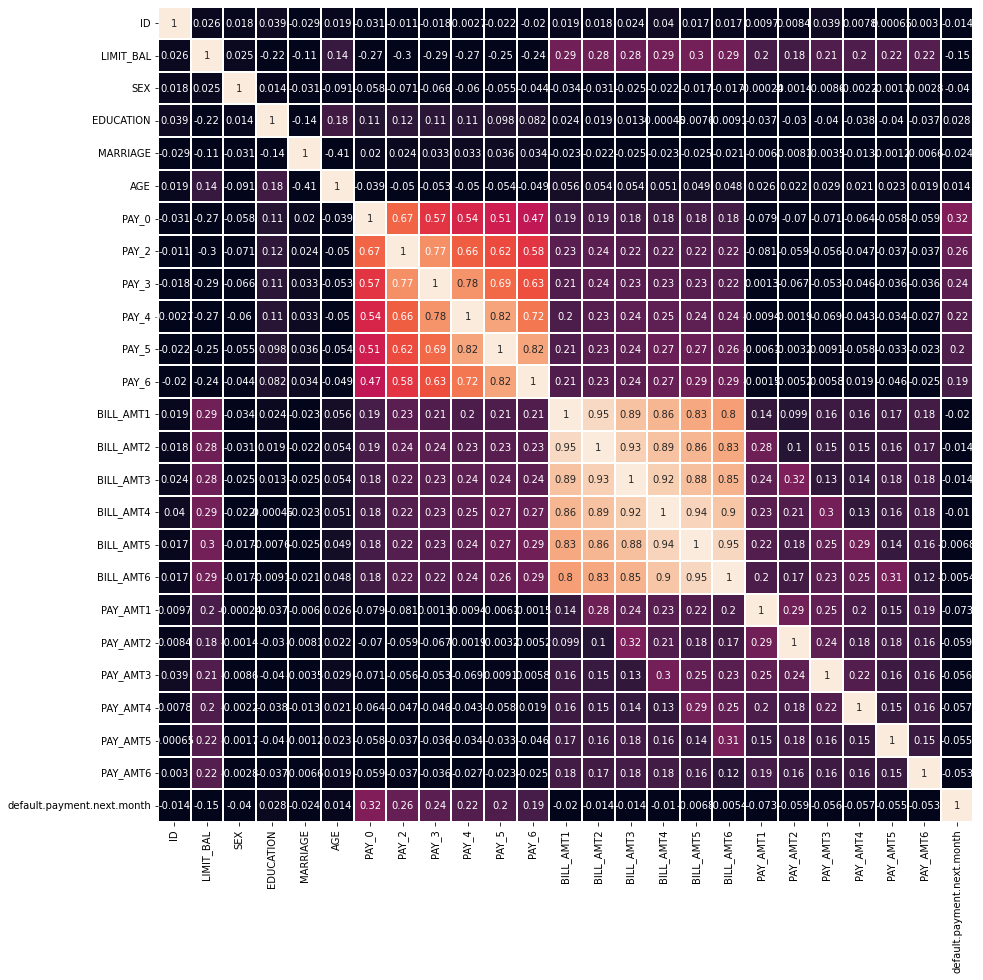

In [8]:
#plotting the heatgraph of correlation
fig, ax = plt.subplots(figsize = (20,15))
ax = sns.heatmap(corr_df,
                 cbar=0,
                 linewidths=2,
                 vmin = 0,
                 vmax = 1,
                 annot=True,
                 square=True)
plt.show()

## <em>Findings of heatmap & establishing Bayesian network</em>

<p>As we can clearly observe from above heatmap, marriage and age has significant effect on the education factor.
From education we can also observe relationships that exists with the repayment status of clients.
With repayment status, they are all unsurprisingly connected to the default status of the client which makes perfect sense.
Therefore, there is enough relationships in this data which we can proceed to create our Bayesian network.
The network could be summarized as such:</p>

* Marriage & Age --> Education

* Education --> Repayment 1 status

* Repayment period 1 status --> Repayment period 2 status

* Repayment period 2 status --> Default Status of client

In [9]:
# Setting up the bayesian model
model = BayesianModel([
    ('Age','Education'),
    ('Marriage','Education'),
    ('Education','Repayment 1'),
    ('Repayment 1','Repayment 2'),
    ('Repayment 2','Default Status')
])

c:\python39\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


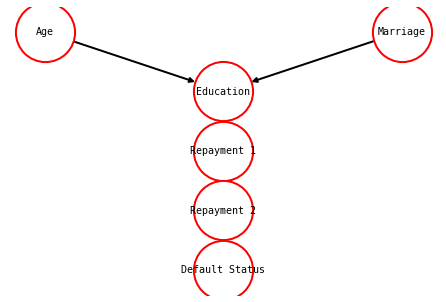

In [10]:
# establishing the chart to show model relationships
pos = {'Age':(0,0),
       'Marriage':(2,0),
       'Education':(1,-2),
       'Repayment 1':(1,-4),
       'Repayment 2':(1,-6),
       'Default Status':(1,-8)}
options = {
    'with_labels': True,
    'font_size': 10,
    'node_size': 3500,
    'node_color': 'white',
    'node_shape': 'o',
    'edgecolors': 'red',
    'linewidths': 2,
    'width': 2,
    'font_family': 'monospace',
}
nx.draw(model, pos, **options)

ax = plt.gca()
plt.axis("off")
plt.show()

In [11]:
#confirming if there are NaNs in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
#removing all the unwanted columns
df_analysis = df[['AGE','EDUCATION','MARRIAGE','PAY_0','PAY_2','default.payment.next.month']]
df_analysis.head()

,AGE,EDUCATION,MARRIAGE,PAY_0,PAY_2,default.payment.next.month
0,24,2,1,2,2,1
1,26,2,2,-1,2,1
2,34,2,2,0,0,0
3,37,2,1,0,0,0
4,57,2,1,-1,0,0


In [13]:
#discretization of all the columns to split them into only 2 possible variations
df_analysis['EDUCATION'].describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

<AxesSubplot:>

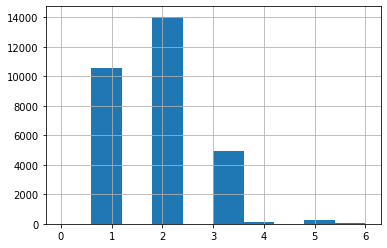

In [14]:
df_analysis['EDUCATION'].hist()

In [15]:
#education split into either 'low' or 'high'
df_analysis['EDUCATION'] = df_analysis['EDUCATION'].apply(
    lambda x:'Low Education' if x <= 2 else
    'High Education'
)
print(df_analysis['EDUCATION'])

0         Low Education
1         Low Education
2         Low Education
3         Low Education
4         Low Education
              ...      
29995    High Education
29996    High Education
29997     Low Education
29998    High Education
29999     Low Education
Name: EDUCATION, Length: 30000, dtype: object


C:\Users\daryl\AppData\Local\Temp\ipykernel_27592\2471781883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['EDUCATION'] = df_analysis['EDUCATION'].apply(


In [16]:
df_analysis['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

<AxesSubplot:>

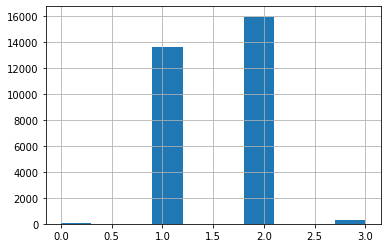

In [17]:
df_analysis['MARRIAGE'].hist()

In [18]:
#marriage split into 'married' or 'not married'
df_analysis['MARRIAGE'] = df_analysis['MARRIAGE'].apply(
    lambda x:'Married' if x == 1 else
    'Not Married'
)
print(df_analysis['MARRIAGE'])

0            Married
1        Not Married
2        Not Married
3            Married
4            Married
            ...     
29995        Married
29996    Not Married
29997    Not Married
29998        Married
29999        Married
Name: MARRIAGE, Length: 30000, dtype: object


C:\Users\daryl\AppData\Local\Temp\ipykernel_27592\3511609772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['MARRIAGE'] = df_analysis['MARRIAGE'].apply(


In [19]:
df_analysis['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<AxesSubplot:>

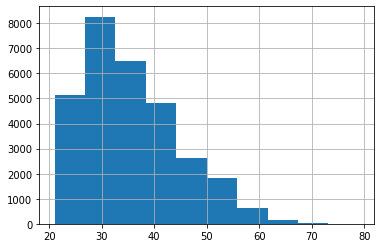

In [20]:
df_analysis['AGE'].hist()

In [21]:
# age split into 'young' or 'old'
df_analysis['AGE'] = df_analysis['AGE'].apply(
    lambda x:'Young' if x <= 36 else
    'Old'
)
print(df_analysis['AGE'])

0        Young
1        Young
2        Young
3          Old
4          Old
         ...  
29995      Old
29996      Old
29997      Old
29998      Old
29999      Old
Name: AGE, Length: 30000, dtype: object


C:\Users\daryl\AppData\Local\Temp\ipykernel_27592\3490500025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['AGE'] = df_analysis['AGE'].apply(


In [22]:
df_analysis['PAY_0'].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64

<AxesSubplot:>

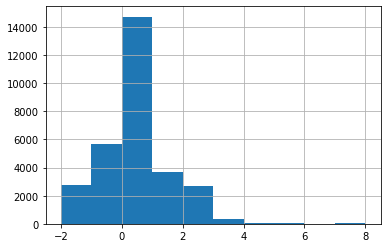

In [23]:
df_analysis['PAY_0'].hist()

In [24]:
# payment status split into 'on time' or 'delay'
df_analysis['PAY_0'] = df_analysis['PAY_0'].apply(
    lambda x:'Payment on time' if x < 0 else
    'Payment delay'
)
print(df_analysis['PAY_0'])

0          Payment delay
1        Payment on time
2          Payment delay
3          Payment delay
4        Payment on time
              ...       
29995      Payment delay
29996    Payment on time
29997      Payment delay
29998      Payment delay
29999      Payment delay
Name: PAY_0, Length: 30000, dtype: object


C:\Users\daryl\AppData\Local\Temp\ipykernel_27592\287901255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['PAY_0'] = df_analysis['PAY_0'].apply(


In [25]:
df_analysis['PAY_2'].describe()

count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64

<AxesSubplot:>

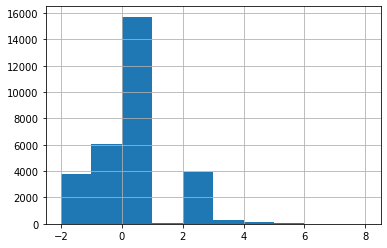

In [26]:
df_analysis['PAY_2'].hist()

In [27]:
# payment status split into 'on time' or 'delay'
df_analysis['PAY_2'] = df_analysis['PAY_2'].apply(
    lambda x:'Payment on time' if x < 0 else
    'Payment delay'
)
print(df_analysis['PAY_2'])

0          Payment delay
1          Payment delay
2          Payment delay
3          Payment delay
4          Payment delay
              ...       
29995      Payment delay
29996    Payment on time
29997      Payment delay
29998    Payment on time
29999      Payment delay
Name: PAY_2, Length: 30000, dtype: object


C:\Users\daryl\AppData\Local\Temp\ipykernel_27592\1587171365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['PAY_2'] = df_analysis['PAY_2'].apply(


In [28]:
df_analysis['default.payment.next.month'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

<AxesSubplot:>

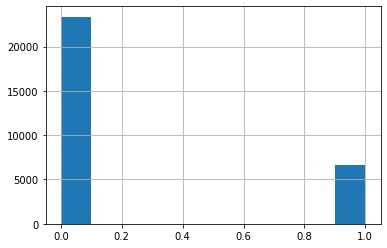

In [29]:
df_analysis['default.payment.next.month'].hist()

In [30]:
# default status split into 'no default' or 'defaulted'
df_analysis['default.payment.next.month'] = df_analysis['default.payment.next.month'].apply(
    lambda x:'Defaulted' if x == 1 else
    'No Default'
)
print(df_analysis['default.payment.next.month'])

0         Defaulted
1         Defaulted
2        No Default
3        No Default
4        No Default
            ...    
29995    No Default
29996    No Default
29997     Defaulted
29998     Defaulted
29999     Defaulted
Name: default.payment.next.month, Length: 30000, dtype: object


C:\Users\daryl\AppData\Local\Temp\ipykernel_27592\1653917283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['default.payment.next.month'] = df_analysis['default.payment.next.month'].apply(


In [31]:
# using pd crosstab function to find out the probabilities
pd.crosstab(df_analysis['AGE'],'Chance',margins = False, normalize='columns')

col_0,Chance
AGE,
Old,0.402767
Young,0.597233


In [32]:
# setting up the tabular CPD for age
cpt_AGE = TabularCPD(
    variable = 'Age',
    variable_card = 2,
    values = [[0.402767],[0.597233]],
    state_names = {
        'Age' : ['Old','Young']
    }
)

In [33]:
pd.crosstab(df_analysis['MARRIAGE'],'Chance',margins = False, normalize='columns')

col_0,Chance
MARRIAGE,
Married,0.4553
Not Married,0.5447


In [34]:
# setting up the tabular CPD for marriage
cpt_MARRIAGE = TabularCPD(
    variable = 'Marriage',
    variable_card = 2,
    values = [[0.4553],[0.5447]],
    state_names = {
        'Marriage' : ['Married','Not Married']
    }
)

## CPT(Education | Age, Marriage) calculations

In [35]:
pd.crosstab(df_analysis['EDUCATION'],[df_analysis['AGE'],df_analysis['MARRIAGE']],margins = True, normalize='columns').sort_index()

AGE                  Old                 Young                   All
MARRIAGE         Married Not Married   Married Not Married          
EDUCATION                                                           
High Education  0.264309    0.281044  0.161762    0.101136  0.179033
Low Education   0.735691    0.718956  0.838238    0.898864  0.820967

In [36]:
# setting up the tabular CPD for Education
cpt_EDUCATION = TabularCPD(
    variable = 'Education',
    variable_card = 2,
    evidence= ['Age','Marriage'],
    evidence_card=[2,2],
    values = [
        [0.264309,0.281044,0.161762,0.101136],
        [0.735691,0.718956,0.838238,0.898864]
              ],
    state_names = {
        'Education' : ['High','Low'],
        'Age' : ['Old','Young'],
        'Marriage' : ['Married','Not Married']
    }
)

## CPT(Repayment 1 | Education) calculations

In [37]:
pd.crosstab(df_analysis['PAY_0'],df_analysis['EDUCATION'],margins = True, normalize='columns')

EDUCATION,High Education,Low Education,All
PAY_0,,,
Payment delay,0.769317,0.707418,0.7185
Payment on time,0.230683,0.292582,0.2815


In [38]:
# setting up the tabular CPD for repayment 1
cpt_REPAY1 = TabularCPD(
    variable = 'Repayment 1',
    variable_card = 2,
    evidence= ['Education'],
    evidence_card=[2],
    values = [
        [0.769317,0.707418],
        [0.230683,0.292582]
              ],
    state_names = {
        'Repayment 1' : ['Payment delay','Payment on time'],
        'Education' : ['High','Low']
    }
)

## CPT(Repayment 2 | Repayment 1) calculations

In [39]:
pd.crosstab(df_analysis['PAY_2'],df_analysis['PAY_0'],margins = True, normalize='columns')

PAY_0,Payment delay,Payment on time,All
PAY_2,,,
Payment delay,0.88694,0.124334,0.672267
Payment on time,0.11306,0.875666,0.327733


In [40]:
# setting up the tabular CPD for repayment 2
cpt_REPAY2 = TabularCPD(
    variable = 'Repayment 2',
    variable_card = 2,
    evidence= ['Repayment 1'],
    evidence_card=[2],
    values = [
        [0.88694,0.124334],
        [0.11306,0.875666]
              ],
    state_names = {
        'Repayment 2' : ['Payment delay','Payment on time'],
        'Repayment 1' : ['Payment delay','Payment on time']
    }
)

## CPT(Default status | Repayment 2) calculations

In [41]:
pd.crosstab(df_analysis['default.payment.next.month'],df_analysis['PAY_2'],margins = True, normalize='columns')

PAY_2,Payment delay,Payment on time,All
default.payment.next.month,,,
Defaulted,0.246876,0.168531,0.2212
No Default,0.753124,0.831469,0.7788


In [42]:
# setting up the tabular CPD for default status
cpt_default = TabularCPD(
    variable = 'Default Status',
    variable_card = 2,
    evidence= ['Repayment 2'],
    evidence_card=[2],
    values = [
        [0.246876,0.168531],
        [0.753124,0.831469]
              ],
    state_names = {
        'Default Status' : ['Defaulted','No Default'],
        'Repayment 2' : ['Payment delay','Payment on time']
    }
)

In [43]:
# Adding all CPT nodes into the model
model.add_cpds(cpt_AGE,cpt_MARRIAGE,cpt_EDUCATION,cpt_REPAY1,cpt_REPAY2,cpt_default)

In [44]:
#further exploration of model
model.get_leaves()

['Default Status']

In [45]:
#further exploration of model
model.get_parents('Default Status')

['Repayment 2']

In [46]:
#further exploration of model
model.get_cpds()

[<TabularCPD representing P(Age:2) at 0x25379d9aee0>,
 <TabularCPD representing P(Marriage:2) at 0x25379d9ae50>,
 <TabularCPD representing P(Education:2 | Age:2, Marriage:2) at 0x25379db8e80>,
 <TabularCPD representing P(Repayment 1:2 | Education:2) at 0x25379dd31f0>,
 <TabularCPD representing P(Repayment 2:2 | Repayment 1:2) at 0x25379dd3eb0>,
 <TabularCPD representing P(Default Status:2 | Repayment 2:2) at 0x25379dd9dc0>]

In [47]:
# ensuring model probabilities and set-up is correct
model.check_model()

True

In [48]:
# initializing the querying by using variable elimination
inference = VariableElimination(model)

In [49]:
# testing the model by first asking the probability of defaulting
prob_default = inference.query(variables = ['Default Status'], joint = False)
print(prob_default['Default Status'])

+----------------------------+-----------------------+
| Default Status             |   phi(Default Status) |
+============================+=======================+
| Default Status(Defaulted)  |                0.2212 |
+----------------------------+-----------------------+
| Default Status(No Default) |                0.7788 |
+----------------------------+-----------------------+


c:\python39\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(



## <em>Question 1 : Probability of defaulting if education is 'High'</em>

<p>As shown below, when the education of concerned client is 'High', the chance of him defaulting is actually slightly higher.
This does conflict with common understanding that higher education will yield higher jobs which enables better chance of repayment.
However, there are other underlying factors which may explain this result. Possible explanations for this result that i could think of is:</p>

* Higher education may lead to higher expectation in life which leads to higher loan where high income may not be able to cover as well.
* Higher education might cause other financial loads such a education loans which may affect credit card repayment.

<p>Ultimately, this serve to prove that DSS could provide deeper insights such a this which may not be apparant at first look which further proves the
effectiveness of a DSS during data analysis.</p>

In [50]:
prob_default_low_education = inference.query(
    variables = ['Default Status'],
    evidence={'Education' : 'High'},
    joint = False
)
print(prob_default_low_education['Default Status'])

+----------------------------+-----------------------+
| Default Status             |   phi(Default Status) |
+============================+=======================+
| Default Status(Defaulted)  |                0.2242 |
+----------------------------+-----------------------+
| Default Status(No Default) |                0.7758 |
+----------------------------+-----------------------+


## <em>Question 2 : Comparison of Default status when repayment period 2 is 'on-time' vs 'delay'</em>

<p>As shown below, when the repayment is on time in period 2 compared to when its delayed, the chance of the client defaulting payment is drastically increased by roughly 10%. This is within expectations as when the client is unable to repay on time, it makes sense that they will have trouble making the complete payment by the month. This also proves that the Bayesian network is working as intended</p>

In [51]:
prob_default_pay_delay = inference.query(
    variables = ['Default Status'],joint = False,
    evidence={
        'Repayment 2' : 'Payment delay',
    }
)
print(prob_default_pay_delay['Default Status'])

+----------------------------+-----------------------+
| Default Status             |   phi(Default Status) |
+============================+=======================+
| Default Status(Defaulted)  |                0.2469 |
+----------------------------+-----------------------+
| Default Status(No Default) |                0.7531 |
+----------------------------+-----------------------+


In [52]:
prob_default_ontime = inference.query(
    variables = ['Default Status'],joint = False,
    evidence={
        'Repayment 2' : 'Payment on time'
    }
)
print(prob_default_ontime['Default Status'])

+----------------------------+-----------------------+
| Default Status             |   phi(Default Status) |
+============================+=======================+
| Default Status(Defaulted)  |                0.1685 |
+----------------------------+-----------------------+
| Default Status(No Default) |                0.8315 |
+----------------------------+-----------------------+


## <em>Question 3 : Comparison of Default status when age is 'Young' vs 'Old'</em>

<p>As shown below, the age of the client does not significant affect the results of default status as the chance of default did not change much.
Inference could be made such that at any age range, each individual takes on their personal loan ranges, hence the main key point if a person defaults their loan is definitely not the age but other certain factors such as income or risk appetite</p>

In [53]:
prob_default_pay_delay = inference.query(
    variables = ['Default Status'],joint = False,
    evidence={
        'Age' : 'Old',
    }
)
print(prob_default_pay_delay['Default Status'])

+----------------------------+-----------------------+
| Default Status             |   phi(Default Status) |
+============================+=======================+
| Default Status(Defaulted)  |                0.2215 |
+----------------------------+-----------------------+
| Default Status(No Default) |                0.7785 |
+----------------------------+-----------------------+


c:\python39\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [56]:
prob_default_pay_delay = inference.query(
    variables = ['Default Status'],joint = False,
    evidence={
        'Age' : 'Young',
    }
)
print(prob_default_pay_delay['Default Status'])

+----------------------------+-----------------------+
| Default Status             |   phi(Default Status) |
+============================+=======================+
| Default Status(Defaulted)  |                0.2210 |
+----------------------------+-----------------------+
| Default Status(No Default) |                0.7790 |
+----------------------------+-----------------------+


c:\python39\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
